<a href="https://colab.research.google.com/github/soumya-kole/bigquery/blob/main/BigQuery_bquxjob_342bb2d5_18c0ee0b83c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'bigqueryproject-406400' # Project ID inserted based on the query results selected to explore
location = 'southamerica-west1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=bigqueryproject-406400:southamerica-west1:bquxjob_342bb2d5_18c0ee0b83c)
back to BigQuery to edit the query within the BigQuery user interface.

In [11]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_342bb2d5_18c0ee0b83c') # Job ID inserted based on the query results selected to explore
print(job.query)

-- SELECT 
-- 	country,
-- 	date,
-- 	daily_vaccinations
-- FROM
-- 	`bigqueryproject-406400.data_analysis.country_vaccinations`
--   where country='Afghanistan'
-- 	and date='2021-02-22'

SELECT 
	country As Country,
	extract(year from date) as Year,
	extract(month from date) as Month,
	SUM(daily_vaccinations) AS Num_vaccinations
FROM 
	`bigqueryproject-406400.data_analysis.country_vaccinations`
WHERE 
	country IN ('England', 'India', 'United States')
GROUP BY 
	Country, Year, Month
ORDER BY 1,2,3



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_342bb2d5_18c0ee0b83c') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

## Plot the data

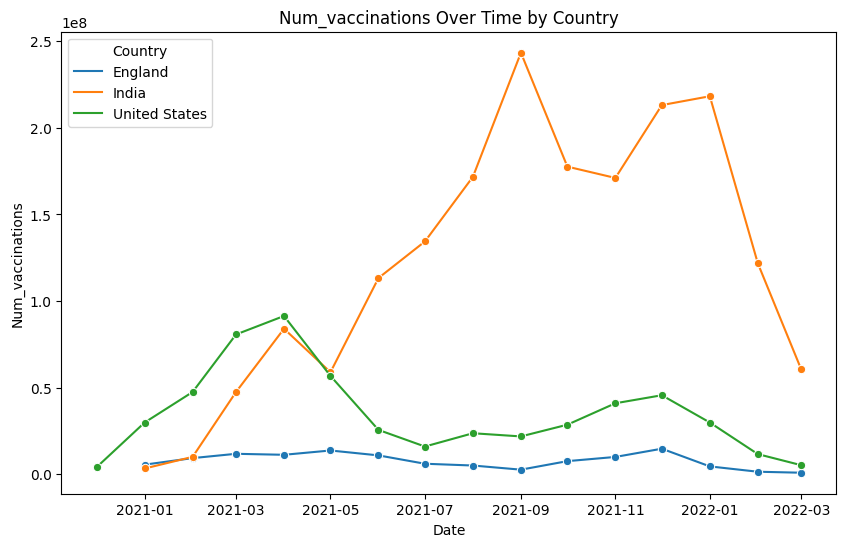

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results['Date'] = pd.to_datetime(results[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Num_vaccinations', hue='Country', data=results, marker='o')
plt.title('Num_vaccinations Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Num_vaccinations')
plt.legend(title='Country')
plt.show()


In [ ]:
job = client.get_job('bquxjob_3e7ac297_18c0f20b970') # Job ID inserted based on the query results selected to explore
three_months_ma_df = job.to_dataframe()


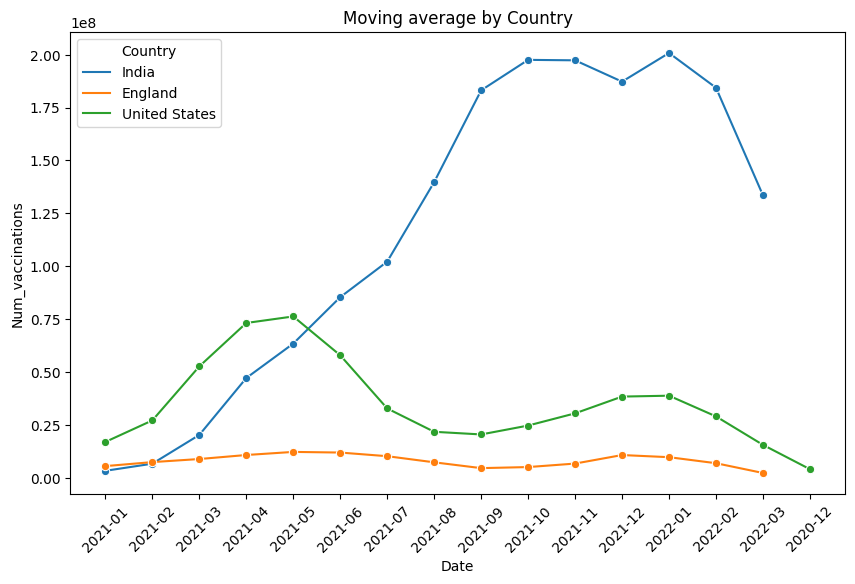

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_month', y='three_month_ma', hue='country', data=three_months_ma_df, marker='o')
plt.title('Moving average by Country')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Num_vaccinations')
plt.legend(title='Country')
plt.show()


In [22]:
job = client.get_job('bquxjob_74f67b34_18c0f36c605') # Job ID inserted based on the query results selected to explore
percent_change = job.to_dataframe()
percent_change

,country,year,month,percentage_change
0,India,2021,1,100.00
1,India,2021,2,198.97
2,India,2021,3,370.32
3,India,2021,4,76.85
4,India,2021,5,-29.87
5,India,2021,6,92.24
6,India,2021,7,18.63
7,India,2021,8,27.77
8,India,2021,9,41.71
9,India,2021,10,-27.02


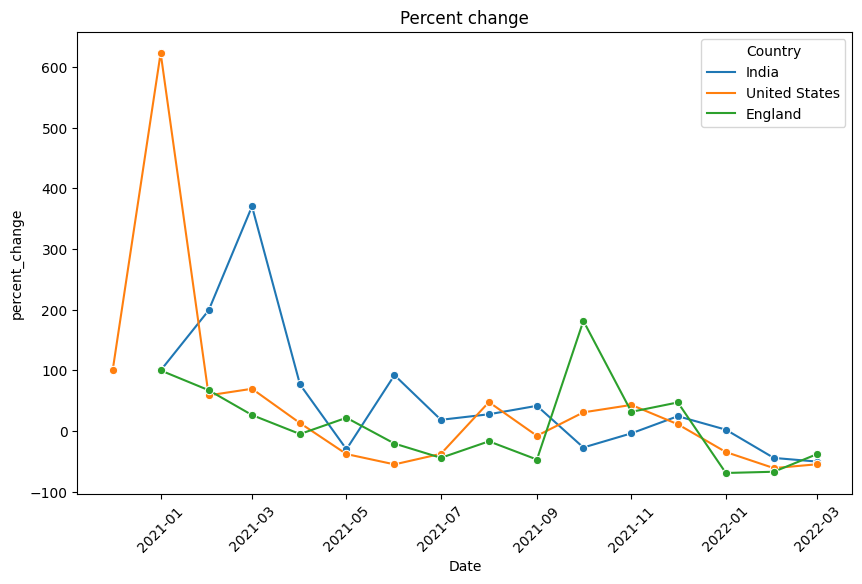

In [24]:
percent_change['Date'] = pd.to_datetime(percent_change[['year', 'month']].assign(DAY=1))
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='percentage_change', hue='country', data=percent_change, marker='o')
plt.title('Percent change')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('percent_change')
plt.legend(title='Country')
plt.show()


In [ ]:
job = client.get_job('bquxjob_54d9d7da_18c0f89e97a') # Job ID inserted based on the query results selected to explore
rt = job.to_dataframe()
rt

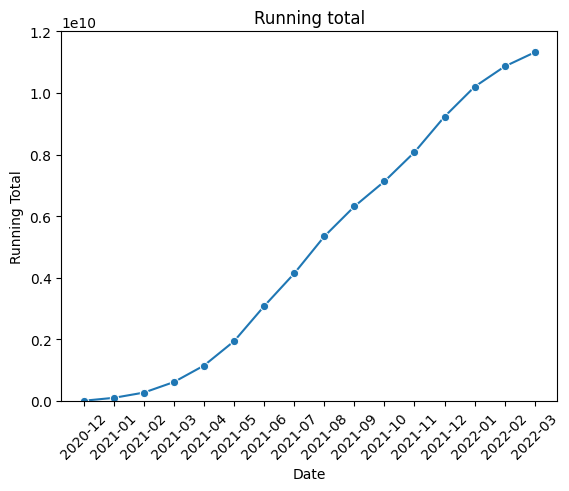

In [31]:
sns.lineplot(x='yr_month', y='running_total', data=rt, marker='o')
plt.title('Running total')
plt.ylim(0, 12000000000)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Running Total')
plt.show()
